# <center>Métodos de Otimização de Sistemas Mecânicos - IM380</center>
# <center> Arthur França Martins </center>

___

Cada solução de capítulo será feita em um tópico separado, no entanto, será necessário rodar o primeiro bloco de *Imports* para importar as bibliotecas empregadas na solução dos problemas.

In [2]:
#Import de bibliotecas utilizadas no decorrer dos exercícios

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Capítulo 3 - Minimização Irrestrita Univariável

## Funções Básicas

Antes de iniciar a programação dos exercícios, criar-se-á funções gerais que serão empresadas pelos exercícios a seguir. A função $f$ consiste em uma função que gera polinômios.

In [3]:
def f(x,coeficientes):
    '''
    RECEBE UM PONTO X E UMA LISTA DE COEFICIENTES E RETORNA O POLINÔMIO CALCULADO NO PONTO X
    '''
    polynomial = 0
    for count in range(len(coeficientes)):
        polynomial += coeficientes[count] * x ** count
    return (polynomial)

A função $grafico()$ consiste apenas em um plot de gráfico customizado visando evitar repetição de tal bloco ao longo desta solução.

In [4]:
def Grafico(min, max, coeficientes, funcao = f):
    '''
    RECEBE UM PONTO MÍNIMO, UM MÁXIMO, UMA FUNÇÃO POLINOMIAL E SEUS COEFICIENTES E RETORNA O GRÁFICO DA FUNÇÃO
    '''
    x = np.arange(min,max,0.1)
    plt.figure(figsize=(3, 3))
    plt.plot(x,funcao(x,coeficientes))
    plt.xlabel("X")
    plt.ylabel("f(x)")
    plt.grid()

A função $TermoFibonacci()$ cuja função consiste em retornar o valor de um termo da sequência de Fibonacci *e.g.* o valor $10$ retorna o 10° termo da sequência de valor $55$.

In [5]:
def TermoFibonacci(termo):
    '''
    RECEBE A POSIÇÃO DE UM TERMO DA SEQUÊNCIA DE FIBONACCI E RETORNA O VALOR CORRESPONDENTE
    '''
    if (termo==1) or (termo==2):
        return 1
    else:
        ultimo = 1
        penultimo = 1
        count=3
        while count <= termo:
            atual = ultimo + penultimo
            ultimo = penultimo
            penultimo = atual
            count += 1
        return atual

Para resolver os algorítimo que envolvem derivadas duas funções se fazem necessárias, a $PrimeiraDerivada()$ que consiste no cálculo da derivada primeira e a $SegundaDerivada()$ que calcula a segunda derivada.

In [6]:
def PrimeiraDerivada(x,coeficientes,h,funcao = f):
    '''
    RECEBE UM PONTO X, COEFICIENTES DE UM POLINÔMIO E O INCREMENTO H E RETORNA A PRIMEIRA DERIVADA NO PONTO X
    '''
    incremento = x + h
    decremento = x - h
    return ((funcao(incremento,coeficientes) - funcao(decremento,coeficientes))/(2*h))

def SegundaDerivada(x,coeficientes,h,funcao = f):
    '''
    RECEBE UM PONTO X, COEFICIENTES DE UM POLINÔMIO E O INCREMENTO H E RETORNA A SEGUNDA DERIVADA NO PONTO X
    '''
    incremento = x + h
    decremento = x - h
    return ((funcao(incremento,coeficientes) - 2*funcao(x,coeficientes) + funcao(decremento,coeficientes))/(h**2))

## 3.1 Busca Dicotômica

O primeiro exercício consiste em formular o algorítimo para o método supracitado

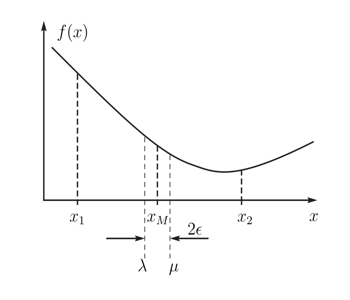

In [7]:
Image.open("BuscaDicotomica.png").resize((350,300))

O método da busca dicotômica consiste na divisão do intervalo de incerteza $[x1, x2]$ ao meio a cada iteração.

O ponto médio do intervalo é dado pela Equação (1).

\begin{equation}
    x_m = \dfrac{x_2 + x_1}{2}
\end{equation}

A função *encontrarMinimo* aplica o método da busca dicotômica bem como plota o gráfico da função fornecida e ainda sinaliza no gráfico as tentativas executadas.

In [8]:
def BuscaDicotomica(x1, x2, coeficientes, erro, funcao = f, max_iteracoes=100):
    '''
    RECEBE DOIS VALORES, UMA LISTA DE COEFICIENTES E UM ERRO MÁXIMO E RETORNA O VALOR CORRESPONDENTE AO MÍNIMO DA FUNÇÃO 
    UTILIZANDO A BUSCA DICOTÔMICA
    '''
    
    Grafico(x1, x2, coeficientes)
    plt.title("Busca Dicotômica")
        
    iteracoes = 1
    while abs(x1 - x2) >= 1.2*erro or (iteracoes < max_iteracoes):
        xm = (x1+x2)/2
        xMu = xm + erro/2
        xLambda = xm - erro/2
        
        f_mu = funcao(xMu,coeficientes)
        f_lambda = funcao(xLambda,coeficientes)
        
        if f_mu > f_lambda:
            x2 = xMu
        elif f_mu < f_lambda:
            x1 = xLambda
        iteracoes += 1
        
        plt.plot(xm,funcao(xm,coeficientes),'o')
        
    return (x1+x2)/2

O bloco abaixo possui apenas uma chamada simples da função *BuscaDicotomica*

1.9999924648912022

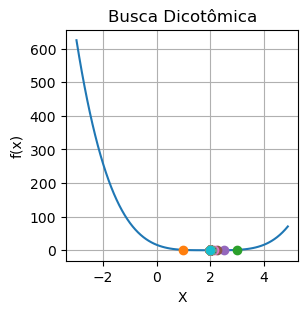

In [9]:
coeficientes = [16, -32, 24, -8, 1]
x1 = -3
x2 = 5
erro = 0.001

BuscaDicotomica(x1,x2,coeficientes,erro)

## 3.2 Busca Busca dicotômica usando a primeira derivada

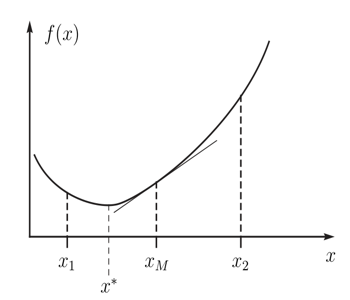

In [10]:
Image.open("BuscaDicotomicaDerivada.png").resize((350,300))

A função *BuscaDicotomicaDerivada* aplica o método da busca de Dicotômica empregando a primeira derivada bem como plota o gráfico da função fornecida e ainda sinaliza no gráfico as tentativas executadas.

In [11]:
def BuscaDicotomicaDerivada(x1, x2, coeficientes, erro, funcao = f, max_iteracoes=100):
    '''
    RECEBE DOIS VALORES, UMA LISTA DE COEFICIENTES E UM ERRO MÁXIMO E RETORNA O VALOR CORRESPONDENTE AO MÍNIMO DA FUNÇÃO 
    UTILIZANDO A BUSCA DICOTÔMICA
    '''
    Grafico(x1, x2, coeficientes)
    plt.title("Busca Dicotômica com a \nPrimeira Derivada")
    
    iteracoes = 1

    while abs(x1 - x2) >= 1.2*erro or (iteracoes < max_iteracoes):
        
        xm = (x1+x2)/2
        
        if PrimeiraDerivada(xm,coeficientes,h=0.00001) > 0:
            x2 = xm
        else:
            x1 = xm
    
        iteracoes += 1
        
        plt.plot(xm,funcao(xm,coeficientes),'o')
        
    return (x1+x2)/2

Bloco abaixo apenas chama a função para verificar seu funcionamento

2.0002445301906704

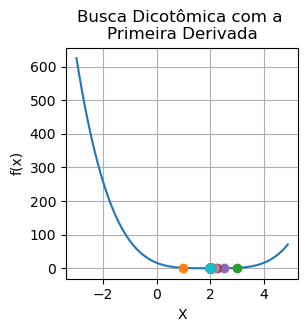

In [12]:
coeficientes = [16, -32, 24, -8, 1]
x1 = -3
x2 = 5
erro = 0.001
termoFibonacci = 100

BuscaDicotomicaDerivada(x1,x2,coeficientes,erro)

## 3.3 Busca de Fibonacci

A sequência de Fibonacci é dada por ${1, 1, 2, 3, 5, 8, 13, . . ., F_{n-2}, F_{n-1}, (F_{n-2}+ F_{n-1}), . . .}$, ou seja $Fn = F_{n-2} + F_{n-1}$, com $n$ = 3, 4, . . . e $F1$ = $F2$ = 1. Considere o intervalo inicial dado por [$a1$, $b1$] e a notação ilustrada na Figura abaixo.

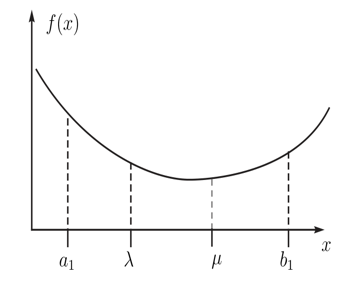

In [13]:
Image.open("BuscaFibonacci.png").resize((350,300))

A função *BuscaFibonacci* aplica o método da busca de Fibonacci bem como plota o gráfico da função fornecida e ainda sinaliza no gráfico as tentativas executadas.

In [14]:
def BuscaFibonacci(x1, x2, coeficientes, termoFib, erro, funcao = f):
    '''
    RECEBE DOIS VALORES, UMA LISTA DE COEFICIENTES E UM ERRO MÁXIMO E RETORNA O VALOR CORRESPONDENTE AO MÍNIMO DA FUNÇÃO 
    UTILIZANDO A BUSCA DICOTÔMICA
    '''
    erro_parada = 1.2*erro
    
    Grafico(x1, x2, coeficientes)
    plt.title("Busca de Fibonacci")
    iteracoes = 1
    
    while (abs(x1-x2)>=erro_parada and (termoFib-iteracoes)>=3):
        
        xm = (x1+x2)/2
        
        aux = termoFib-iteracoes
        FibNKMINUS1 = TermoFibonacci(aux-1)
        FibNK = TermoFibonacci(aux)
        FibNKPLUS1 = TermoFibonacci(aux+1)
        
        Xmu = x1 + (FibNK/FibNKPLUS1)*(x2-x1)
        Xlambda = x1 + (FibNKMINUS1/FibNKPLUS1)*(x2-x1)
        
        if funcao(Xmu,coeficientes) > funcao(Xlambda,coeficientes):
            x2 = Xmu
        elif funcao(Xmu,coeficientes) < funcao(Xlambda,coeficientes):
            x1 = Xlambda
        iteracoes += 1
    
        plt.plot(xm,funcao(xm,coeficientes),'o')
        
    return (x1+x2)/2

Bloco abaixo apenas chama a função para verificar seu funcionamento

1.9999279321776622

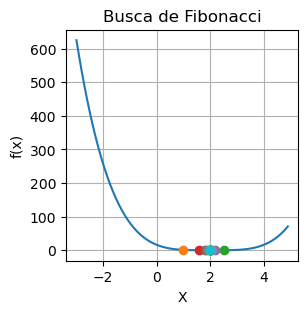

In [15]:
coeficientes = [16, -32, 24, -8, 1]
x1 = -3
x2 = 5
erro = 0.001
termoFibonacci = 100

BuscaFibonacci(x1,x2,coeficientes,termoFibonacci,erro)

## 3.4 Método de Newton

O método de *Newton* minimiza, em cada iteração, a aproximação pela razão entre derivada primeira e segunda da função objetivo

In [16]:
def MetodoNewton(x, coeficientes, erro, funcao = f, max_iteracoes=100):
    '''
    RECEBE DOIS VALORES, UMA LISTA DE COEFICIENTES E UM ERRO MÁXIMO E RETORNA O VALOR CORRESPONDENTE AO MÍNIMO DA FUNÇÃO 
    UTILIZANDO A BUSCA DICOTÔMICA
    '''
    erro_parada = 1.2*erro
    
    iterador = 1
    
    while (iterador <= max_iteracoes):
        
        X_kplus1 = x - (PrimeiraDerivada(x, coeficientes,h=0.0001)/SegundaDerivada(x, coeficientes,h=0.0001))

        if (abs(X_kplus1 - x) < erro_parada):
            break
            
        x = X_kplus1
        
    return (X_kplus1)

Bloco abaixo apenas chama a função para verificar seu funcionamento

In [17]:
coeficientes = [16, -32, 24, -8, 1]
x = 5
erro = 0.001

MetodoNewton(x,coeficientes,erro)

2.0020442101149634

## 3.5 Busca unidimensional por Ajuste Quadrático

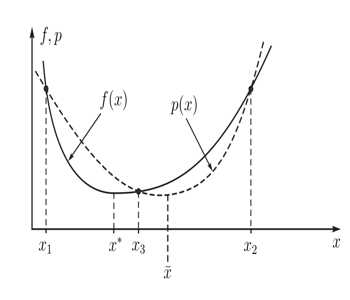

In [18]:
Image.open("AproximacaoQuadratica.png").resize((350,300))

Na busca quadrática três pontos conhecidos são interpolados gerando uma função quadrática que é minimizada a cada iteração. Estes três pontos são da forma $(x_1, f(x_1) = f_1)$, $(x_2, f(x_2) = f_2)$ e $(x_3, f(x_3) = f_3)$

In [21]:
def AjusteQuadratico(x_1, x_3, x_2, coeficientes, erro, funcao = f, max_iteracoes=100):
    '''
    RECEBE DOIS VALORES, UMA LISTA DE COEFICIENTES E UM ERRO MÁXIMO E RETORNA O VALOR CORRESPONDENTE AO MÍNIMO DA FUNÇÃO 
    UTILIZANDO A BUSCA DICOTÔMICA
    '''
    
    Grafico(x1, x2, coeficientes)
    plt.title("Busca de Unidimensional \npor Ajuste Quadrático")
    
    erro_parada = 1.2*erro
    
    iterador = 1
    
    f_1 = funcao(x_1,coeficientes)
    f_2 = funcao(x_2,coeficientes)
    f_3 = funcao(x_3,coeficientes)
    
    dp_x = 0.5*(((x_2**2 - x_3**2)*f_1 + (x_3**2 - x_1**2)*f_2 + (x_1**2 - x_2**2)*f_3)/((x_2-x_3)*f_1 + (x_3-x_1)*f_2 + (x_1-x_2)*f_3))
    
    #ddp_x = ((x_2-x_3)*f_1 + (x_3-x_1)*f_2 + (x_1-x_2)*f_3)/((x_2-x_3)*(x_3-x_1)*(x_1-x_2))

    while (PrimeiraDerivada(dp_x,coeficientes,h=0.00001)>=erro_parada) or (iterador <= max_iteracoes):
        
        f_1 = funcao(x_1,coeficientes)
        f_2 = funcao(x_2,coeficientes)
        f_3 = funcao(x_3,coeficientes)
        
        if x_3 < dp_x and dp_x < x_2:
            if funcao(dp_x,coeficientes) > funcao(x_3,coeficientes):
                x_2 = x_3
                x_3 = dp_x
            else:
                x_1 = dp_x
        elif x_3 < dp_x and dp_x < x_2:
            if funcao(dp_x,coeficientes) > funcao(x_3,coeficientes):
                x_2 = dp_x
            else:
                x_1 = x_3
                x_3 = dp_x
                
        dp_x = 0.5*(((x_2**2 - x_3**2)*f_1 + (x_3**2 - x_1**2)*f_2 + (x_1**2 - x_2**2)*f_3)/((x_2-x_3)*f_1 + (x_3-x_1)*f_2 + (x_1-x_2)*f_3))

        iterador += 1
        plt.plot(dp_x,funcao(dp_x,coeficientes),'o')
        
    return dp_x

Bloco abaixo apenas chama a função para verificar seu funcionamento

1.983294824591517

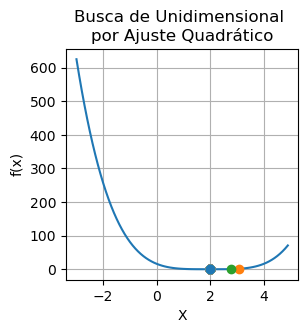

In [22]:
coeficientes = [16, -32, 24, -8, 1]
x1 = -3
x2 = 5
x3 = (x1 + x2) / 2
erro = 0.001

AjusteQuadratico(x1,x3,x2,coeficientes,erro)

## Testes

Mínimo com Busca Dicotômica: 1.99999
Mínimo com Busca Dicotômica com Primeira Derivada: 2.00024
Mínimo com Busca de Fibonacci: 1.99993
Mínimo com Busca Pelo Método de Newton: 1.99773
Mínimo com Busca Pelo do Ajuste Quadrático: 1.98329


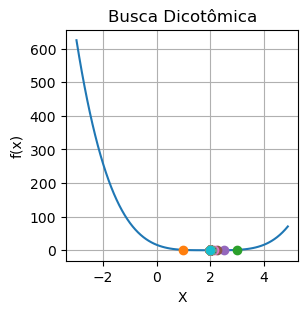

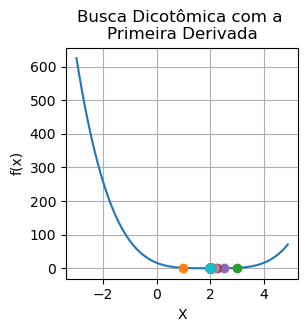

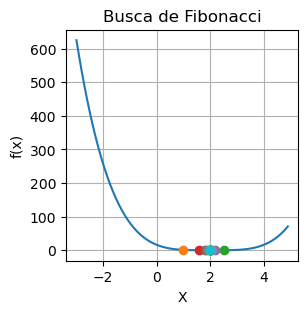

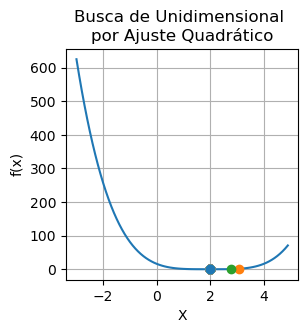

In [23]:
coeficientes = [16, -32, 24, -8, 1]
x1 = -3
x2 = 5
x = (x1 + x2)/2
erro = 0.001
termoFibonacci = 50

casas_decimais = 5


print(f'Mínimo com Busca Dicotômica: {round(BuscaDicotomica(x1,x2,coeficientes,erro),casas_decimais)}')
print(f'Mínimo com Busca Dicotômica com Primeira Derivada: {round(BuscaDicotomicaDerivada(x1,x2,coeficientes,erro),casas_decimais)}')
print(f'Mínimo com Busca de Fibonacci: {round(BuscaFibonacci(x1,x2,coeficientes,termoFibonacci,erro),casas_decimais)}')
print(f'Mínimo com Busca Pelo Método de Newton: {round(MetodoNewton(x,coeficientes,erro),casas_decimais)}')
print(f'Mínimo com Busca Pelo do Ajuste Quadrático: {round(AjusteQuadratico(x1,x,x2,coeficientes,erro),casas_decimais)}')